In [1]:
!pip install diagrams

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 59.0 MB/s eta 0:00:00


In [ ]:
!pip install diagrams

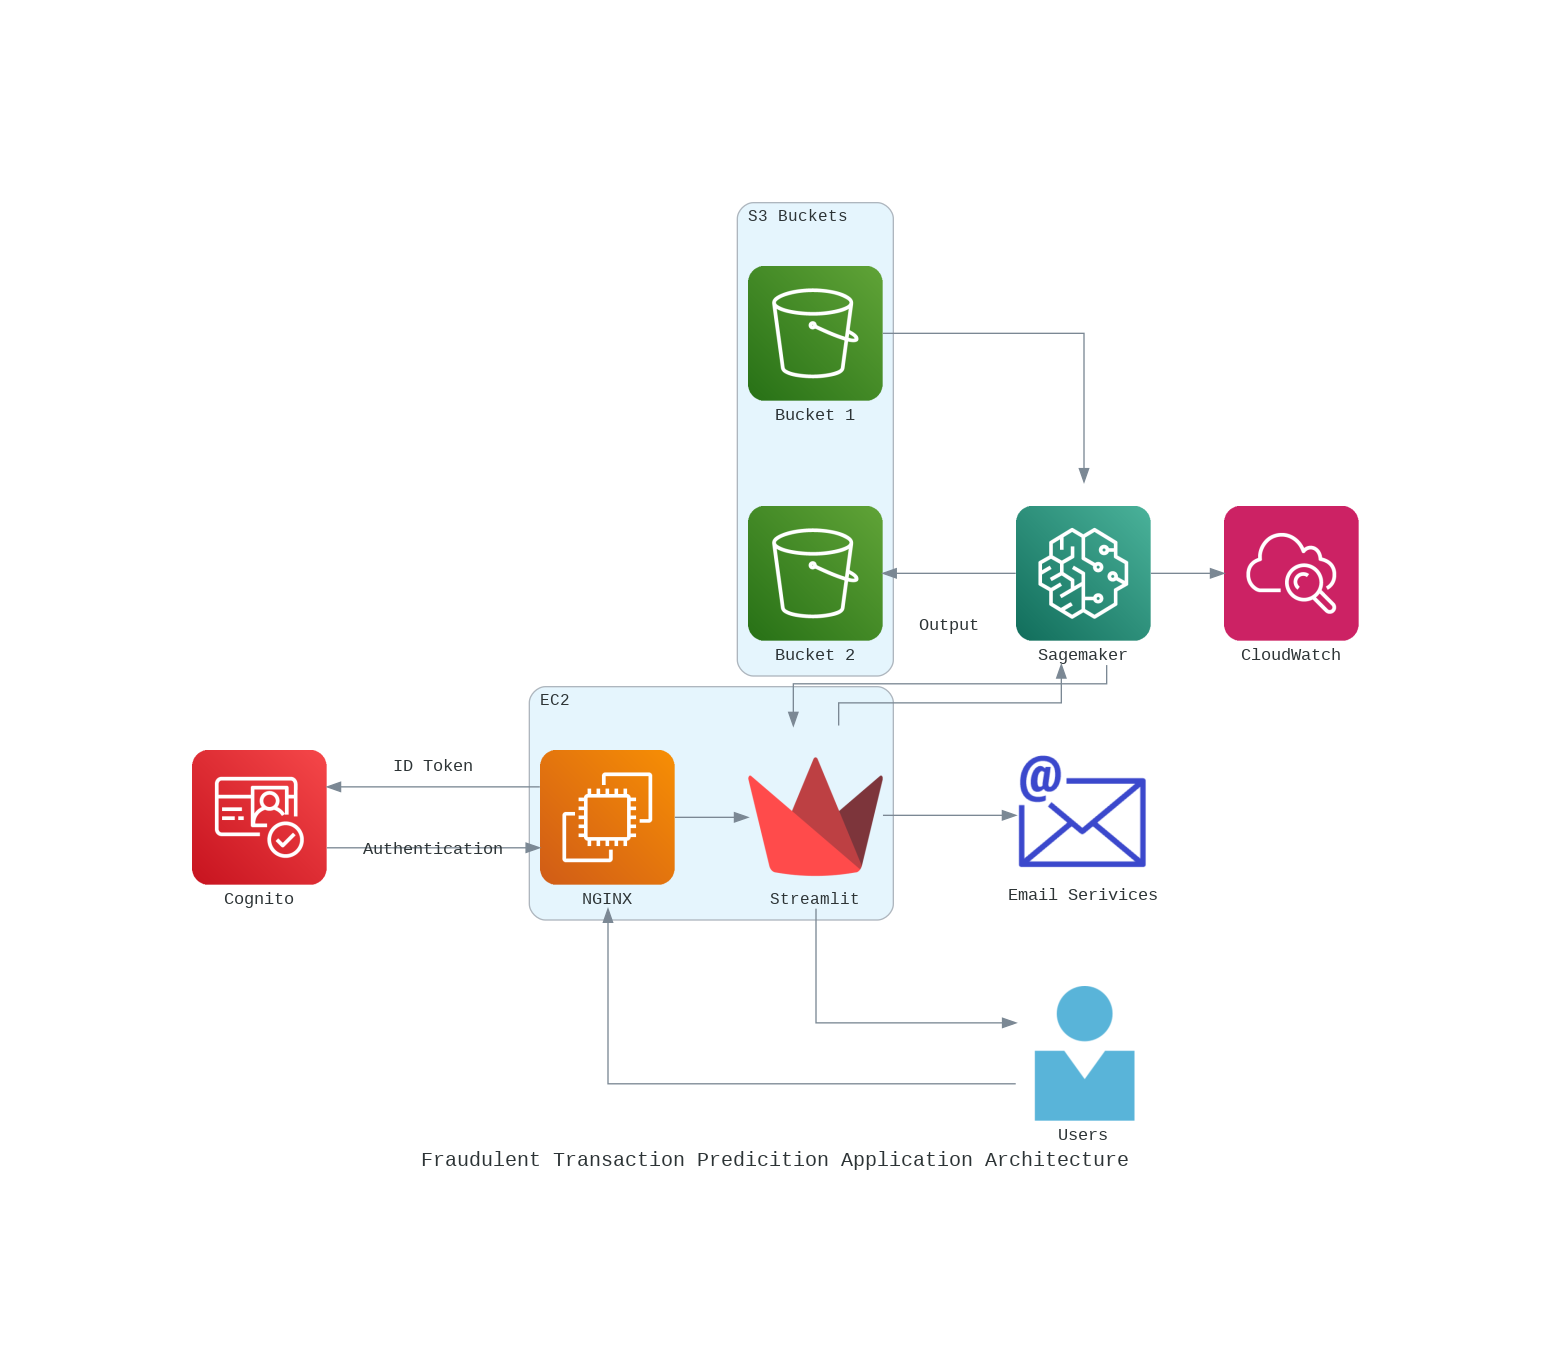

In [44]:
from diagrams import Diagram, Node, Cluster, Edge
from diagrams.custom import Custom
from diagrams.aws.compute import EC2
from diagrams.aws.storage import S3
from diagrams.aws.ml import Sagemaker
from diagrams.aws.security import Cognito
from diagrams.aws.management import Cloudwatch
from diagrams.aws.general import User
from diagrams.aws.engagement import SimpleEmailServiceSesEmail
from diagrams.azure.general import Usericon
from urllib.request import urlretrieve
from PIL import Image


with Diagram("Fraudulent Transaction Predicition Application Architecture", show=False, direction="LR", outformat="png") as diag:
    # S3 Buckets
    with Cluster("S3 Buckets"):
        bucket2 = S3("Bucket 1")
        bucket3 = S3("Bucket 2")

    # Sagemaker
    sagemaker = Sagemaker("Sagemaker")

    # Cognito
    cognito = Cognito("Cognito")

    # SES
    ses = SimpleEmailServiceSesEmail("Email Serivices")

    # Connect components
    bucket2 >> sagemaker
    sagemaker >> bucket3

    # User
    user = Usericon("Users")

    # EC2 Cluster with Streamlit and NGINX
    with Cluster("EC2"):
        streamlit_URL = "https://blog.streamlit.io/content/images/size/w1000/2021/03/logomark-color.png"
        website_icon_path = "streamlit.png"
        urlretrieve(streamlit_URL, website_icon_path)
        img = Image.open(website_icon_path)
        resized_img = img.resize((280, 250))
        resized_img.save(website_icon_path)

        streamlit = Custom("Streamlit",website_icon_path, edge_label=" ", fontsize="12")
        nginx = EC2("NGINX")
        nginx >> streamlit

    # Connect Sagemaker to Streamlit without attempting to add a label directly
    sagemaker >> Edge(label = "Output") >> streamlit
    streamlit >> sagemaker
    bucket3 >> EC2
    nginx >> Edge(label = "Authentication") >> cognito
    cognito >> Edge(label = "ID Token") >> nginx
    sagemaker >> Cloudwatch("CloudWatch")
    streamlit >> ses
    sagemaker >> Cloudwatch
    user >> nginx
    streamlit >> user

diag

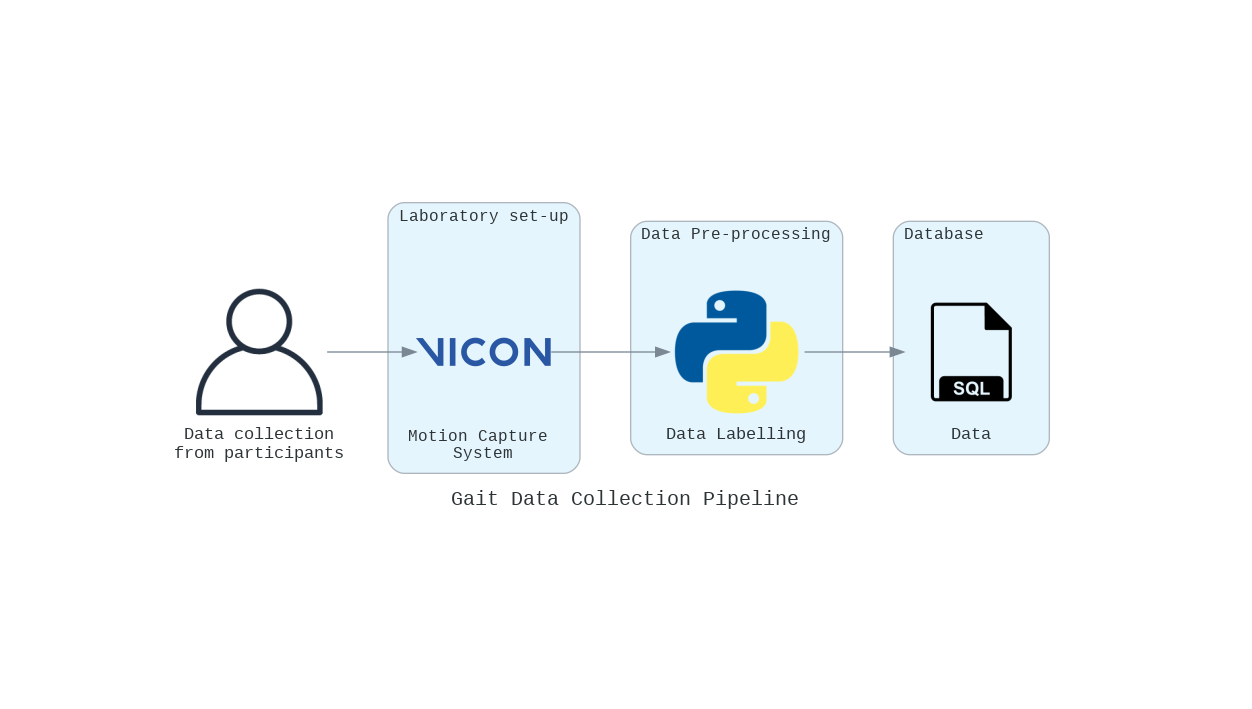

In [43]:
from diagrams import Diagram, Node, Cluster, Edge
from diagrams.azure.general import Usericon
from urllib.request import urlretrieve
from diagrams.aws.general import User
from diagrams.programming.language import Python
from diagrams.generic.database import SQL

# Set up the global diagrams context using the Diagram class
with Diagram("Gait Data Collection Pipeline", show=False, direction="LR", outformat="png") as show:

    # Create nodes
    user = User("Data collection\nfrom participants")


    # Create clusters
    with Cluster("Laboratory set-up"):
        vicon_URL = "https://logemas.com/wp-content/uploads/2020/04/Copy-of-VICON_Logo_NEW_light-blue-1-1-1.png"
        vicon_icon_path = "vicon.png"
        urlretrieve(vicon_URL, vicon_icon_path)
        vicon = Custom("Motion Capture \nSystem",vicon_icon_path, edge_label="Motion Capture System", fontsize="12")

    with Cluster("Data Pre-processing"):
      python = Python("Data Labelling")


    with Cluster("Database"):
      SQL = SQL("Data")

    # Create edges to connect nodes
    user >> vicon
    vicon >> python
    python >> SQL

show

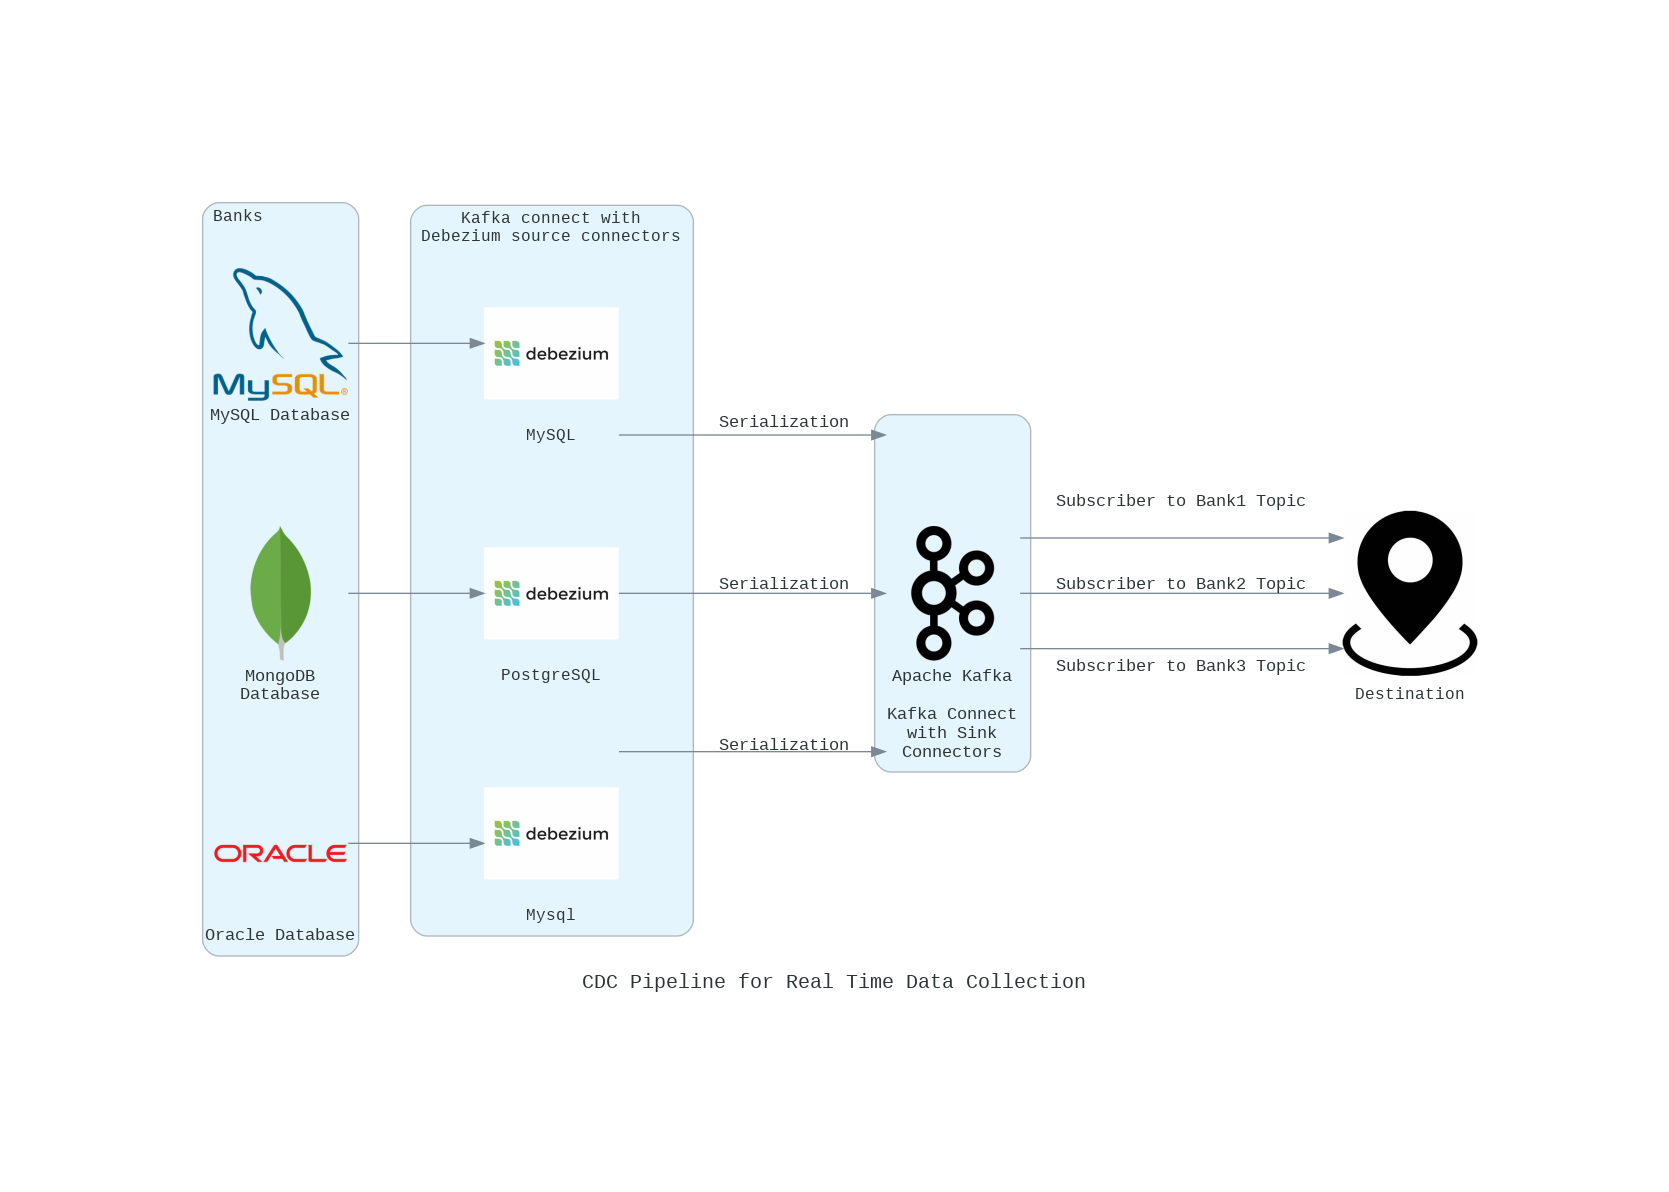

In [75]:
from diagrams.onprem.database import Mysql
from diagrams.onprem.database import Mongodb
from diagrams.onprem.database import Oracle
from diagrams import Diagram, Node, Cluster, Edge
from urllib.request import urlretrieve
from diagrams.custom import Custom
from diagrams.onprem.queue import Kafka
from diagrams.generic.storage import Storage

# Set up the global diagrams context using the Diagram class
with Diagram("CDC Pipeline for Real Time Data Collection", show=False, direction="LR", outformat="png") as print:

  # Defining nodes
  with Cluster(""):
    debezium_url = "https://th.bing.com/th/id/OIP.lwFMWUmEbKzzmeFC_wlnggHaFE?rs=1&pid=ImgDetMain"
    debezium_icon_path = "debezium.png"
    urlretrieve(debezium_url, debezium_icon_path)
    Kafka = Kafka("Apache Kafka\n\nKafka Connect\nwith Sink\nConnectors")

  #Creating clusters
  with Cluster("Banks"):
    sql = Mysql("MySQL Database")
    mongo = Mongodb("MongoDB\nDatabase")
    oracle = Oracle("Oracle Database")

  #Debezium clusters
  with Cluster("Kafka connect with\nDebezium source connectors"):
    debezium1 = Custom("MySQL",debezium_icon_path, edge_label="", fontsize="12")
    debezium2 = Custom("PostgreSQL",debezium_icon_path, edge_label="", fontsize="12")
    debezium3 = Custom("Mysql",debezium_icon_path, edge_label="", fontsize="12")

    # Create a Destination box
  dest_URL = "https://th.bing.com/th/id/OIP.2xZU7UcnKKmb_kIO1T7ldAHaJE?rs=1&pid=ImgDetMain"
  dest_icon_path = "destination.png"
  urlretrieve(dest_URL, dest_icon_path)
  dest = Custom("\nDestination",dest_icon_path, edge_label="Destination", fontsize="12")

  #Links
  sql >> debezium1
  mongo >> debezium2
  oracle >> debezium3
  debezium1 >> Edge(label="Serialization") >> Kafka
  debezium2 >> Edge(label="Serialization") >> Kafka
  debezium3 >> Edge(label="Serialization") >> Kafka
Kafka >> Edge(label="Subscriber to Bank1 Topic") >> dest
Kafka >> Edge(label="Subscriber to Bank2 Topic") >> dest
Kafka >> Edge(label="Subscriber to Bank3 Topic") >> dest

print

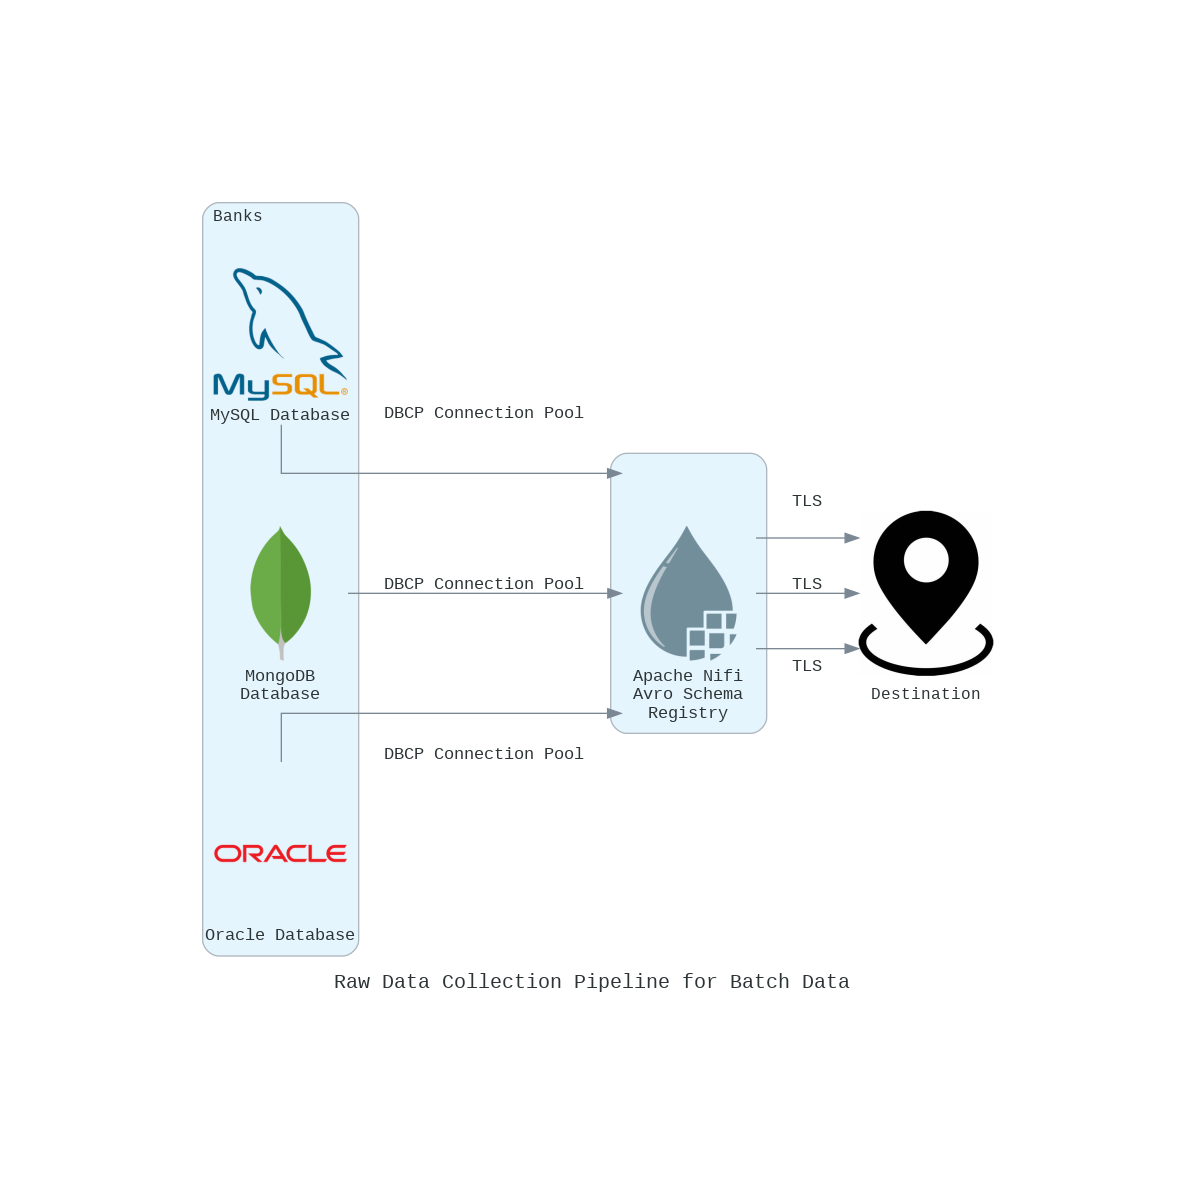

In [76]:
from diagrams.onprem.database import Mysql
from diagrams.onprem.database import Mongodb
from diagrams.onprem.database import Oracle
from diagrams import Diagram, Node, Cluster, Edge
from urllib.request import urlretrieve
from diagrams.custom import Custom
from diagrams.onprem.workflow import Nifi
from diagrams.generic.storage import Storage

# Set up the global diagrams context using the Diagram class
with Diagram("Raw Data Collection Pipeline for Batch Data", show=False, direction="LR", outformat="png") as print:

  # Defining nodes
  with Cluster(""):
    debezium_url = "https://th.bing.com/th/id/OIP.lwFMWUmEbKzzmeFC_wlnggHaFE?rs=1&pid=ImgDetMain"
    debezium_icon_path = "debezium.png"
    urlretrieve(debezium_url, debezium_icon_path)
    nifi = Nifi("Apache Nifi\nAvro Schema\nRegistry")

  #Creating clusters
  with Cluster("Banks"):
    sql = Mysql("MySQL Database")
    mongo = Mongodb("MongoDB\nDatabase")
    oracle = Oracle("Oracle Database")

  # Create a Destination box
  dest_URL = "https://th.bing.com/th/id/OIP.2xZU7UcnKKmb_kIO1T7ldAHaJE?rs=1&pid=ImgDetMain"
  dest_icon_path = "destination.png"
  urlretrieve(dest_URL, dest_icon_path)
  dest = Custom("\nDestination",dest_icon_path, edge_label="Destination", fontsize="12")

  #Links
  sql >> Edge(label="DBCP Connection Pool") >> nifi
  mongo >> Edge(label="DBCP Connection Pool") >> nifi
  oracle >> Edge(label="DBCP Connection Pool") >> nifi
nifi >> Edge(label="TLS") >> dest
nifi >> Edge(label="TLS") >> dest
nifi >> Edge(label="TLS") >> dest

print